# CE2101/CZ2101 ALGORITHM DESIGN AND ANALYSIS
# Project 1: Integration of Mergesort & Insertion Sort

In [1]:
import random
from time import process_time
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

pd.set_option('display.max_rows', None)

### (a) Algorithm implementation: Implement the above hybrid algorithm.

In [2]:
#################### MERGESORT & INSERTION SORT ####################
#### input: array, threshold integer | output: key comparisons
def insertMergeSort(arr, S):
    keyComp = 0 
    # Merge Sort
    if len(arr) > S:
        mid = len(arr) // 2  # floor division
        
        left = arr[:mid] # new subarrays left and right
        right = arr[mid:]
        keyComp += insertMergeSort(left, S)
        keyComp += insertMergeSort(right, S)

        # merge
        # index to keep track of arr
        index = a = b = 0

        while a < len(left) and b < len(right):
            keyComp += 1
            # Case 1: left element is bigger
            if left[a] < right[b]:
                arr[index] = left[a]  # write into arr (sorted array)
                a += 1
                # "remove" the element from left sublist
                
            # Case 2: right element is bigger
            elif left[a] > right[b]:
                arr[index] = right[b]  # write into arr (sorted array)
                b += 1
                # "remove" the element from right sublist
                
            # Case 3: both elements have the same key value
            else:
                arr[index] = left[a]
                a += 1
                index += 1
                arr[index] = right[b]
                b += 1
            index += 1

        # Check for remaining elements
        # Only one of these loops will run
        while a < len(left):
            arr[index] = left[a]
            a += 1
            index += 1
        while b < len(right):
            arr[index] = right[b]
            b += 1
            index += 1
            
    # Insertion Sort
    else:
        for i in range(1, len(arr)):
            for j in range(i, 0, -1):
                keyComp += 1
                if arr[j] < arr[j - 1]:
                    arr[j], arr[j - 1] = arr[j - 1], arr[j]
                else:
                    break

    return keyComp  # report key comparisons
####################################################################

### (b) Generate input data: Generate arrays of increasing sizes, in a range from 1,000 to 10 million.

In [3]:
######################## INPUT GENERATOR ########################
### input: array size, largest integer allowed | output: array
def inputGen(sizeArr, x):
    returnList = []
    for i in range(0, sizeArr):
        n = random.randint(1, x)
        returnList.append(n)
    return returnList
################################################################

### Helper Functions

In [4]:
##################### printList #####################
### input: array | output: N/A (print to console)
def printList(arr):
    for i in range(len(arr)):
        print(arr[i], end=" ")
    print()
####################################################

In [5]:
##################### plotGraphFromDF #####################
### input: dataframe with two columns, X and Y | output: N/A (pop-up window with plot)
def plotGraphFromDF(df):
    plt.plot(df[df.columns[0]], df[df.columns[1]])
    plt.title(df.columns[1] + ' against ' + df.columns[0])
    plt.ylabel(df.columns[1])
    plt.xlabel(df.columns[0])
    plt.yscale('linear')
    plt.xscale('linear')

plt.show()
####################################################

### (c) Analyze time complexity

#### Cursory note 1: Deciding on the value of x (the largest number of the array)

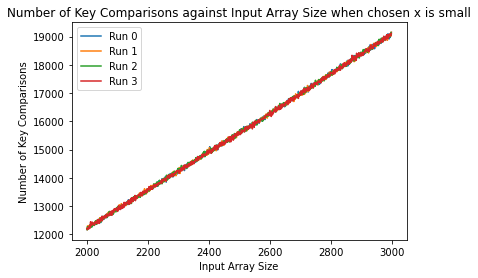

In [6]:
S = 4
keyCompArr = []
keyCompArrOfArr = []
df = pd.DataFrame(size for size in range(2000,3000))
df.columns = ['Size of Array']
loops = 4

x=5
for loop in range(loops):
    keyCompArr = []
    for i in df['Size of Array']:
        arr = inputGen(i, x)
        keyCompArr.append(insertMergeSort(arr, S))
    plt.plot(df['Size of Array'], keyCompArr, label = "Run " + str(loop))
    
plt.legend()
plt.title("Number of Key Comparisons against Input Array Size when chosen x is small")
plt.ylabel("Number of Key Comparisons")
plt.xlabel("Input Array Size")
plt.yscale('linear')
plt.xscale('linear')
plt.show()

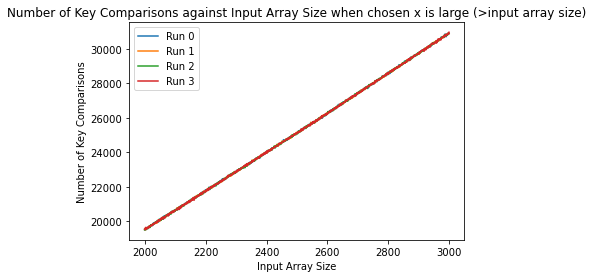

In [7]:
S = 4
keyCompArr = []
keyCompArrOfArr = []
df = pd.DataFrame(size for size in range(2000,3000))
df.columns = ['Size of Array']
loops = 4

x=1000000
for loop in range(loops):
    keyCompArr = []
    for i in df['Size of Array']:
        arr = inputGen(i, x)
        keyCompArr.append(insertMergeSort(arr, S))
    plt.plot(df['Size of Array'], keyCompArr, label = "Run " + str(loop))
    
plt.legend()
plt.title("Number of Key Comparisons against Input Array Size when chosen x is large (>input array size)")
plt.ylabel("Number of Key Comparisons")
plt.xlabel("Input Array Size")
plt.yscale('linear')
plt.xscale('linear')
plt.show()

As seen from comparing the two graphs, the variability of the number of key comparisons is greater when x is small. This is because, with small x, there is a higher probability of having duplicate keys in the array, resulting in less key comparisons when sorting.

**Hence, there is a need to select a sufficiently high value of x to minimise duplicate keys and hence reduce the variance in key comparisons**

Formally, if x is less than the array size, there will definitely be duplicate keys (pigeonhole principle), although the inverse is not true (we can still have duplicate keys with high x by the nature of random number generator)

### i. With the value of S fixed, plot the number of key comparisons over different sizes of the input list n.

In [8]:
S = 4
df = pd.DataFrame(columns = ['sizeArr', 'keyCompArr']) # Create empty dataframe

for i in range(3,7,1):
    for j in range(1, 11, 2):
        arr = inputGen(j * pow(10,i), pow(10,7)) # for 1*1000, 3*1000, ..., 11*1000, 1*10000, 3*10000, ...
        keyComp = insertMergeSort(arr, S)
    
        df = df.append({'sizeArr' : j * pow(10,i), 'keyCompArr' : keyComp}, 
                ignore_index = True) # Append row
df

sizeArr keyCompArr
0      1000       8746
1      3000      30884
2      5000      55271
3      7000      80802
4      9000     107259
5     10000     120500
6     30000     409900
7     50000     718177
8     70000    1041913
9     90000    1368697
10   100000    1536047
11   300000    5087189
12   500000    8851679
13   700000   12700286
14   900000   16668135
15  1000000   18678668
16  3000000   60409397
17  5000000  104038885
18  7000000  148633762
19  9000000  193877005

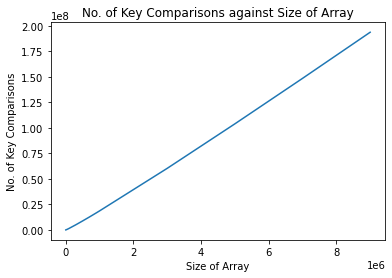

In [9]:
plotGraphFromDF(
    pd.DataFrame(
        {
            'Size of Array'          : df['sizeArr'],
            'No. of Key Comparisons' : df['keyCompArr']
        }
    )
)

### ii. With the input size n fixed, plot the number of key comparisons over different values of S. Compare your empirical results with your theoretical analysis of the time complexity.

Let n = 10,000 for the sake of this comparison. Since S supposed to be a small integer, test S = 1 to S = 32.

In [10]:
df2 = pd.DataFrame(columns = ['S', 'keyCompArr']) # Create empty dataframe
arr2 = inputGen(pow(10,4), pow(10,4)) # Test on the same array
    
for i in range(1,32,1):
    tempArr = arr2.copy()
    keyComp = insertMergeSort(tempArr, i)
    df2 = df2.append({'S' : i, 'keyCompArr' : keyComp}, 
                ignore_index = True) # Append row
    
df2

S keyCompArr
0    1     116755
1    2     116755
2    3     116800
3    4     116852
4    5     117838
5    6     117838
6    7     117838
7    8     117838
8    9     118832
9   10     123524
10  11     123524
11  12     123524
12  13     123524
13  14     123524
14  15     123524
15  16     123524
16  17     123524
17  18     123524
18  19     130694
19  20     140073
20  21     140073
21  22     140073
22  23     140073
23  24     140073
24  25     140073
25  26     140073
26  27     140073
27  28     140073
28  29     140073
29  30     140073
30  31     140073

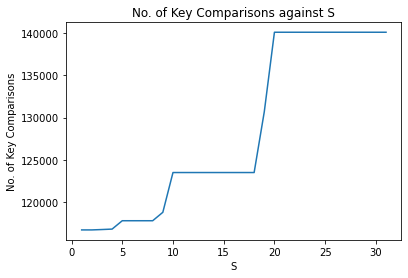

In [11]:
plotGraphFromDF(
    pd.DataFrame(
        {
            'S'                      : df2['S'],
            'No. of Key Comparisons' : df2['keyCompArr']
        }
    )
)

Theoretical analysis:
Taking an array of 16 elements i.e. n = 16

No. of subarray for S = 4 - 7 has 4 subarrays
No. of subarray for S = 2 - 3 has 8 subarrays

### iii. Using different sizes of input datasets, study how to determine an optimal value of S for the best performance of this hybrid algorithm.

In [12]:
df3 = pd.DataFrame(columns = ['Input Size', 'S', 'Key Comparisons', 'CPU Time']) # Create empty dataframe
   
for inputSize in [1000, 2000, 4000, 8000, 16000, 32000, 64000, 128000, 256000, 512000, 1024000, 2048000, 4096000, 10000000]:
    for S in range(1,32,1):
        t1_start = process_time()  # For insertMergeSort
        keyComp = insertMergeSort(inputGen(inputSize, inputSize), S)
        t1_stop = process_time()
        df3 = df3.append({'Input Size' : inputSize, 'S' : S, 'Key Comparisons' : keyComp, 'CPU Time' : t1_stop - t1_start}, 
                ignore_index = True) # Append row
    
df3

Input Size     S  Key Comparisons    CPU Time
0        1000.0   1.0           8347.0    0.005435
1        1000.0   2.0           8328.0    0.004508
2        1000.0   3.0           8385.0    0.004453
3        1000.0   4.0           8394.0    0.004481
4        1000.0   5.0           8422.0    0.005695
5        1000.0   6.0           8373.0    0.004496
6        1000.0   7.0           8434.0    0.004464
7        1000.0   8.0           8774.0    0.004826
8        1000.0   9.0           8763.0    0.004868
9        1000.0  10.0           8721.0    0.004197
10       1000.0  11.0           8654.0    0.004212
11       1000.0  12.0           8846.0    0.004127
12       1000.0  13.0           8724.0    0.004044
13       1000.0  14.0           8787.0    0.004156
14       1000.0  15.0           9119.0    0.004900
15       1000.0  16.0           9774.0    0.004107
16       1000.0  17.0           9988.0    0.004212
17       1000.0  18.0           9941.0    0.004159
18       1000.0  19.0           9831.0    0.004125
19       1000.0  20.0          10031.0    0.004336
20       1000.0  21.0          10039.0    0.004232
21       1000.0  22.0           9845.0    0.004193
22       1000.0  23.0           9951.0    0.004203
23       1000.0  24.0           9901.0    0.004152
24       1000.0  25.0           9868.0    0.004242
25       1000.0  26.0           9967.0    0.004176
26       1000.0  27.0           9811.0    0.004128
27       1000.0  28.0           9765.0    0.004129
28       1000.0  29.0          10014.0    0.004164
29       1000.0  30.0           9987.0    0.004177
30       1000.0  31.0          12288.0    0.004685
31       2000.0   1.0          18667.0    0.010854
32       2000.0   2.0          18708.0    0.010041
33       2000.0   3.0          18684.0    0.009745
34       2000.0   4.0          18811.0    0.009125
35       2000.0   5.0          18823.0    0.011572
36       2000.0   6.0          18787.0    0.009409
37       2000.0   7.0          18850.0    0.009321
38       2000.0   8.0          19540.0    0.008954
39       2000.0   9.0          19457.0    0.008846
40       2000.0  10.0          19466.0    0.008871
41       2000.0  11.0          19618.0    0.008883
42       2000.0  12.0          19438.0    0.009370
43       2000.0  13.0          19483.0    0.008822
44       2000.0  14.0          19468.0    0.009309
45       2000.0  15.0          20340.0    0.009009
46       2000.0  16.0          21927.0    0.009128
47       2000.0  17.0          21735.0    0.009049
48       2000.0  18.0          21906.0    0.009171
49       2000.0  19.0          22048.0    0.009164
50       2000.0  20.0          22117.0    0.009203
51       2000.0  21.0          22166.0    0.009342
52       2000.0  22.0          21874.0    0.009146
53       2000.0  23.0          21806.0    0.010056
54       2000.0  24.0          21685.0    0.009166
55       2000.0  25.0          22035.0    0.009221
56       2000.0  26.0          21861.0    0.009270
57       2000.0  27.0          21892.0    0.009111
58       2000.0  28.0          21754.0    0.009222
59       2000.0  29.0          21837.0    0.009180
60       2000.0  30.0          21913.0    0.009137
61       2000.0  31.0          26155.0    0.010011
62       4000.0   1.0          41295.0    0.022642
63       4000.0   2.0          41248.0    0.021020
64       4000.0   3.0          41323.0    0.020888
65       4000.0   4.0          41605.0    0.020114
66       4000.0   5.0          41569.0    0.019888
67       4000.0   6.0          41538.0    0.019741
68       4000.0   7.0          41711.0    0.020224
69       4000.0   8.0          42903.0    0.019819
70       4000.0   9.0          42949.0    0.019417
71       4000.0  10.0          43060.0    0.021998
72       4000.0  11.0          42833.0    0.020075
73       4000.0  12.0          43115.0    0.019191
74       4000.0  13.0          42967.0    0.019291
75       4000.0  14.0          42886.0    0.019192
76       4000.0  15.0          44458.0    0.019380
77       4000.0  16.0      

In [13]:
KeyComps = df3.pivot(index='Input Size', columns='S', values='Key Comparisons')
KeyComps

S                  1.0          2.0          3.0          4.0          5.0   \
Input Size                                                                    
1000.0           8347.0       8328.0       8385.0       8394.0       8422.0   
2000.0          18667.0      18708.0      18684.0      18811.0      18823.0   
4000.0          41295.0      41248.0      41323.0      41605.0      41569.0   
8000.0          90621.0      90595.0      90620.0      91080.0      91058.0   
16000.0        197241.0     197216.0     197154.0     198077.0     198277.0   
32000.0        426438.0     426438.0     426588.0     428315.0     428419.0   
64000.0        916883.0     916959.0     916932.0     920620.0     920539.0   
128000.0      1962472.0    1961201.0    1961648.0    1968989.0    1968897.0   
256000.0      4179585.0    4180409.0    4179926.0    4194956.0    4194718.0   
512000.0      8872165.0    8871537.0    8871855.0    8902241.0    8901102.0   
1024000.0    18767773.0   18767001.0   18767351.0   18826922.0   18827175.0   
2048000.0    39581015.0   39581452.0   39582764.0   39702180.0   39702140.0   
4096000.0    83260285.0   83261083.0   83259290.0   83498505.0   83497214.0   
10000000.0  216323360.0  216319132.0  216320234.0  216443725.0  217325514.0   

S                  6.0          7.0          8.0          9.0          10.0  \
Input Size                                                                    
1000.0           8373.0       8434.0       8774.0       8763.0       8721.0   
2000.0          18787.0      18850.0      19540.0      19457.0      19466.0   
4000.0          41538.0      41711.0      42903.0      42949.0      43060.0   
8000.0          91195.0      91448.0      94156.0      94070.0      93952.0   
16000.0        198225.0     198878.0     203567.0     204141.0     203998.0   
32000.0        428422.0     429661.0     439914.0     440178.0     439895.0   
64000.0        920724.0     923635.0     944351.0     943821.0     944862.0   
128000.0      1969343.0    1974965.0    2016065.0    2016252.0    2016260.0   
256000.0      4194233.0    4205551.0    4287263.0    4287322.0    4287238.0   
512000.0      8902472.0    8925272.0    9088281.0    9087278.0    9085721.0   
1024000.0    18827013.0   18874697.0   19198142.0   19200074.0   19197540.0   
2048000.0    39701782.0   39797082.0   40439541.0   40446666.0   40445731.0   
4096000.0    83495142.0   83684938.0   84983706.0   84977362.0   84984081.0   
10000000.0  217326331.0  217331262.0  217323913.0  219369613.0  222639024.0   

S           ...         22.0         23.0         24.0         25.0  \
Input Size  ...                                                       
1000.0      ...       9845.0       9951.0       9901.0       9868.0   
2000.0      ...      21874.0      21806.0      21685.0      22035.0   
4000.0      ...      47653.0      47716.0      47973.0      47548.0   
8000.0      ...     103512.0     103596.0     103780.0     103596.0   
16000.0     ...     222552.0     223339.0     222952.0     223200.0   
32000.0     ...     477922.0     478531.0     478556.0     478691.0   
64000.0     ...    1020499.0    1021200.0    1021068.0    1020179.0   
128000.0    ...    2168522.0    2167001.0    2168574.0    2168820.0   
256000.0    ...    4595937.0    4594778.0    4593604.0    4591041.0   
512000.0    ...    9702032.0    9695123.0    9699955.0    9700601.0   
1024000.0   ...   20420022.0   20421591.0   20425550.0   20425148.0   
2048000.0   ...   42900189.0   42895081.0   42890720.0   42895007.0   
4096000.0   ...   89883003.0   89880838.0   89890905.0   89880735.0   
10000000.0  ...  238533210.0  238525922.0  238543879.0  238538174.0   

S                  26.0         27.0         28.0         29.0         30.0  \
Input Size                                                                    
1000.0           9967.0       9811.0       9765.0      10014.0       9987.0   
2000.0          21861.0      21892.0      21754.0      21837.0      21913.0   
4000.0          4

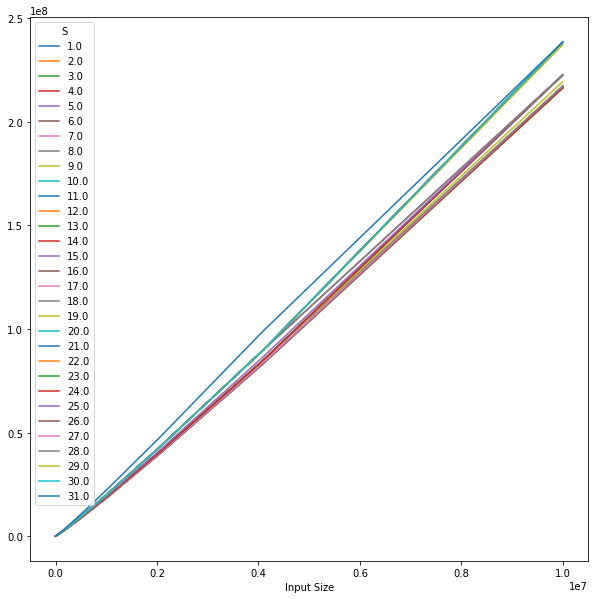

In [14]:
KeyComps.plot(figsize=(10,10))

In [15]:
CPUTime = df3.pivot(index='Input Size', columns='S', values='CPU Time')
CPUTime

S                 1.0         2.0         3.0         4.0         5.0   \
Input Size                                                               
1000.0        0.005435    0.004508    0.004453    0.004481    0.005695   
2000.0        0.010854    0.010041    0.009745    0.009125    0.011572   
4000.0        0.022642    0.021020    0.020888    0.020114    0.019888   
8000.0        0.052256    0.045642    0.044891    0.042641    0.044033   
16000.0       0.104510    0.098894    0.098313    0.094482    0.093476   
32000.0       0.257644    0.209947    0.212986    0.199864    0.203164   
64000.0       0.472193    0.449918    0.445185    0.431320    0.431262   
128000.0      1.123249    0.971206    0.981336    0.944624    0.939056   
256000.0      2.189107    2.068319    2.174564    2.014865    1.986884   
512000.0      4.749058    4.520787    4.496910    4.321978    4.414727   
1024000.0    10.083153    9.524678    9.392473    9.061858    9.239116   
2048000.0    21.485407   21.093320   22.040402   20.666285   19.659160   
4096000.0    51.895052   44.047962   50.512298   47.841670   42.144900   
10000000.0  113.484200  110.588064  108.826638  121.352938  113.141858   

S                 6.0         7.0         8.0         9.0         10.0  ...  \
Input Size                                                              ...   
1000.0        0.004496    0.004464    0.004826    0.004868    0.004197  ...   
2000.0        0.009409    0.009321    0.008954    0.008846    0.008871  ...   
4000.0        0.019741    0.020224    0.019819    0.019417    0.021998  ...   
8000.0        0.043269    0.042584    0.041892    0.042090    0.041817  ...   
16000.0       0.093393    0.097006    0.092692    0.096429    0.094784  ...   
32000.0       0.202914    0.199450    0.199442    0.197359    0.199247  ...   
64000.0       0.431124    0.427852    0.427369    0.426112    0.420874  ...   
128000.0      0.935643    0.957709    0.940386    0.924202    0.972514  ...   
256000.0      1.999340    1.995955    2.083412    1.995691    1.985827  ...   
512000.0      4.450848    4.469343    4.277603    4.221288    4.396885  ...   
1024000.0     9.127070    9.195813    9.221399    9.036504    8.936505  ...   
2048000.0    19.668046   19.515306   19.318301   19.336459   19.259033  ...   
4096000.0    42.115596   42.478072   48.132562   41.443712   42.673590  ...   
10000000.0  109.995451  110.839330  113.386336  110.589231  109.539546  ...   

S                 22.0        23.0        24.0        25.0        26.0  \
Input Size                                                               
1000.0        0.004193    0.004203    0.004152    0.004242    0.004176   
2000.0        0.009146    0.010056    0.009166    0.009221    0.009270   
4000.0        0.019782    0.019998    0.019890    0.019855    0.019567   
8000.0        0.042873    0.046625    0.043400    0.042883    0.043474   
16000.0       0.096197    0.094304    0.094398    0.093356    0.094739   
32000.0       0.206106    0.201127    0.199356    0.203637    0.203390   
64000.0       0.429562    0.431681    0.433256    0.434314    0.433383   
128000.0      0.937590    0.940355    0.930303    0.924874    0.934648   
256000.0      2.089554    2.018664    1.996210    2.041033    1.995641   
512000.0      4.417643    4.326746    4.636023    4.444440    4.349057   
1024000.0     9.400942    9.222053    9.479042    9.553387   11.576751   
2048000.0    20.282883   20.037880   20.188171   20.335369   20.627149   
4096000.0    48.146100   40.783274   43.227273   44.245863   43.481802   
10000000.0  107.814445  107.935559  107.957456  107.662759  107.808824   

S                 27.0        28.0        29.0        30.0        31.0  
Input Size                                                              
1000.0        0.004128    0.004129    0.004164    0.004177    0.004685  
2000.0        0.009111    0.009222    0.009180    0.009137    0.010011  
4000.0        0.020645    0.019839    0.019658    0.019994    0.022285  


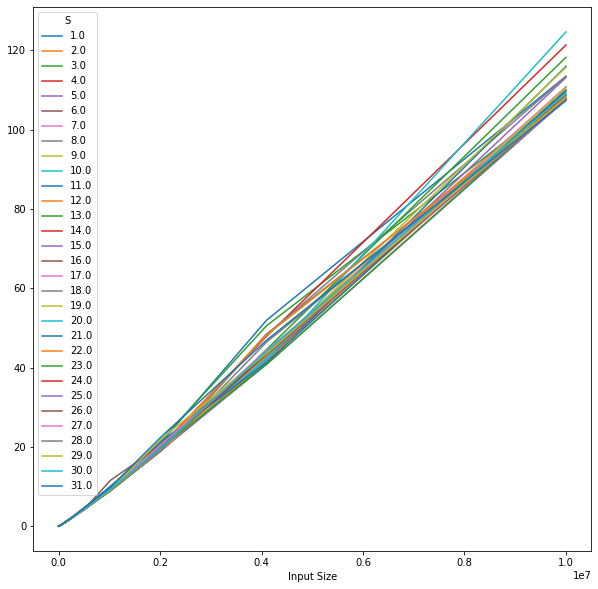

In [16]:
CPUTime.plot(figsize=(10,10))

#### Difference is most pronounced at high input sizes, so let's first examine that

In [17]:
pd.DataFrame(CPUTime.iloc[-1]).sort_values(by=pd.DataFrame(CPUTime.iloc[-1]).columns[0])

10000000.0
S               
31.0  107.369755
17.0  107.429205
15.0  107.568842
28.0  107.593089
25.0  107.662759
18.0  107.698363
27.0  107.704366
26.0  107.808824
22.0  107.814445
23.0  107.935559
24.0  107.957456
16.0  108.084584
29.0  108.247154
14.0  108.534488
3.0   108.826638
12.0  108.895149
30.0  109.121052
10.0  109.539546
21.0  109.839448
6.0   109.995451
2.0   110.588064
9.0   110.589231
7.0   110.839330
5.0   113.141858
8.0   113.386336
1.0   113.484200
19.0  115.741700
11.0  115.987239
13.0  118.258349
4.0   121.352938
20.0  124.661952

In [18]:
pd.DataFrame(KeyComps.iloc[-1]).sort_values(by=pd.DataFrame(KeyComps.iloc[-1]).columns[0])

10000000.0
S                
2.0   216319132.0
3.0   216320234.0
1.0   216323360.0
4.0   216443725.0
8.0   217323913.0
5.0   217325514.0
6.0   217326331.0
7.0   217331262.0
9.0   219369613.0
11.0  222633961.0
14.0  222634433.0
12.0  222638060.0
13.0  222638691.0
15.0  222638812.0
10.0  222639024.0
18.0  222640637.0
17.0  222642548.0
16.0  222644152.0
19.0  237233836.0
23.0  238525922.0
21.0  238528293.0
22.0  238533210.0
26.0  238535570.0
29.0  238537522.0
25.0  238538174.0
20.0  238538539.0
30.0  238541386.0
24.0  238543879.0
31.0  238548125.0
27.0  238549460.0
28.0  238555266.0

S = 3 by key comparisons, S = 9 by CPU time

#### Can we find a consensus value?

In [19]:
cputimeBestS = pd.DataFrame(columns = ['Input Size', 'Best S']) # Create empty dataframe

for i in range(len(CPUTime)):
    cputimeBestS = cputimeBestS.append({'Input Size' : CPUTime.iloc[i].name, 'Best S' : CPUTime.iloc[i].sort_values().index[0]}, 
                ignore_index = True) # Append row
    
cputimeBestS

Input Size  Best S
0       1000.0    13.0
1       2000.0    13.0
2       4000.0    12.0
3       8000.0    11.0
4      16000.0    13.0
5      32000.0    12.0
6      64000.0    14.0
7     128000.0    14.0
8     256000.0    10.0
9     512000.0    14.0
10   1024000.0    10.0
11   2048000.0    10.0
12   4096000.0    23.0
13  10000000.0    31.0

In [20]:
keycompBestS = pd.DataFrame(columns = ['Input Size', 'Best S']) # Create empty dataframe

for i in range(len(KeyComps)):
    keycompBestS = keycompBestS.append({'Input Size' : KeyComps.iloc[i].name, 'Best S' : KeyComps.iloc[i].sort_values().index[0]}, 
                ignore_index = True) # Append row

keycompBestS

Input Size  Best S
0       1000.0     2.0
1       2000.0     1.0
2       4000.0     2.0
3       8000.0     2.0
4      16000.0     3.0
5      32000.0     1.0
6      64000.0     1.0
7     128000.0     2.0
8     256000.0     1.0
9     512000.0     2.0
10   1024000.0     2.0
11   2048000.0     1.0
12   4096000.0     3.0
13  10000000.0     2.0

There is no observable pattern. Based on key comparisons, the ideal S ranges from 1-3. However based on CPU time, the range has a wider variance.

### d) Compare with original Mergesort: Implement the original version of Mergesort (as learnt in lecture). Compare its performance against the above hybrid algorithm in terms of the number of key comparisons and CPU times on the dataset with 10 million integers. You can use the optimal value of S obtained in (c) for this task.

In [21]:
#################### MERGESORT ####################
#### input: array, threshold integer | output: key comparisons
def mergeSort(arr, S):
    keyComp = 0
    if len(arr) > 1:
        mid = len(arr) // 2  # floor division

        left = arr[:mid]
        right = arr[mid:]
        keyComp += insertMergeSort(left, S)
        keyComp += insertMergeSort(right, S)

        # merge
        # index to keep track of arr
        index = a = b = 0

        while a < len(left) and b < len(right):
            keyComp += 1
            if left[a] < right[b]:
                arr[index] = left[a]  # write into arr (sorted array)
                a += 1
                # "remove" the element from left sublist
            elif left[a] > right[b]:
                arr[index] = right[b]  # write into arr (sorted array)
                b += 1
                # "remove" the element from right sublist
            else:
                arr[index] = left[a]
                a += 1
                index += 1
                arr[index] = right[b]
                b += 1
            index += 1

        # Check for remaining elements
        # Only one of these loops will run
        while a < len(left):
            arr[index] = left[a]
            a += 1
            index += 1
        while b < len(right):
            arr[index] = right[b]
            b += 1
            index += 1

    return keyComp  # report key comparisons
####################################################################

In [22]:
# Ideal S value based on key comparisons
S = 3 # input optimal S here
arr3 = inputGen(pow(10,7), pow(10,7)) # array of 10 million integers
arr4 = arr3.copy()

t1_start = process_time()  # For insertMergeSort
kc1 = insertMergeSort(arr3, S)
t1_stop = process_time()  

t2_start = process_time()  # For insertMergeSort
kc2 = mergeSort(arr4, S)
t2_stop = process_time()  

**Hybrid Insertion-Mergesort:**

In [23]:
print("No. of key comparisons: ", kc1, end="\n")
print("Elapsed time during the whole program in seconds:",t1_stop - t1_start)  

No. of key comparisons:  216325306
Elapsed time during the whole program in seconds: 98.29708200000005


**Classic Mergesort:**

In [24]:
print("No. of key comparisons: ", kc2, end="\n")
print("Elapsed time during the whole program in seconds:",t2_stop - t2_start) 

No. of key comparisons:  216325306
Elapsed time during the whole program in seconds: 98.18415999999979


In [25]:
# Ideal S value based on CPU time
S = 9 # input optimal S here
arr5 = inputGen(pow(10,7), pow(10,7)) # array of 10 million integers
arr6 = arr5.copy()

t3_start = process_time()  # For insertMergeSort
kc3 = insertMergeSort(arr5, S)
t3_stop = process_time()  

t4_start = process_time()  # For insertMergeSort
kc4 = mergeSort(arr6, S)
t4_stop = process_time()  

**Hybrid Insertion-Mergesort:**

In [26]:
print("No. of key comparisons: ", kc3, end="\n")
print("Elapsed time during the whole program in seconds:",t3_stop - t3_start)  

No. of key comparisons:  219373339
Elapsed time during the whole program in seconds: 94.71318300000075


**Classic Mergesort:**

In [27]:
print("No. of key comparisons: ", kc4, end="\n")
print("Elapsed time during the whole program in seconds:",t4_stop - t4_start)  

No. of key comparisons:  219373339
Elapsed time during the whole program in seconds: 95.30523899999935
